Least cost path from A to G: A -> B -> D -> G with total cost 4


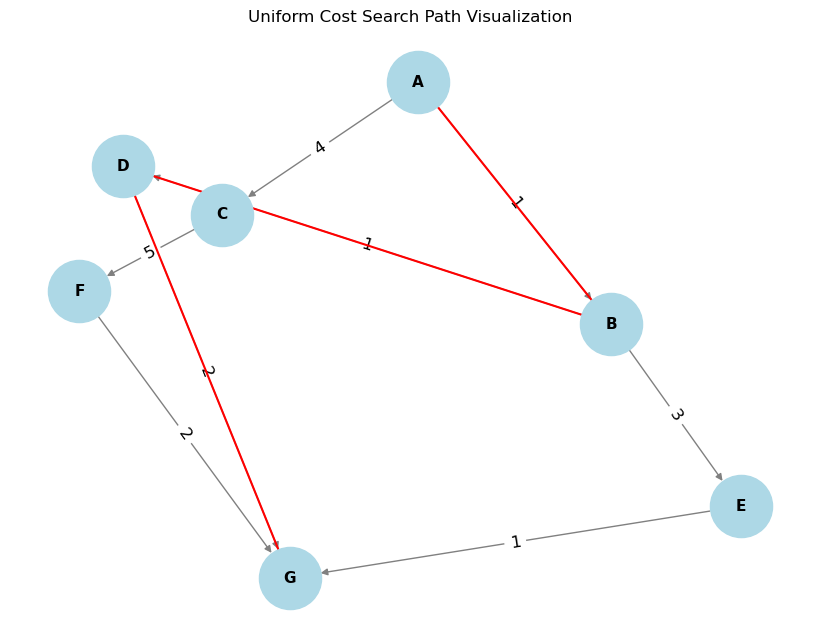

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def uniform_cost_search(graph, start, goal):
    
    priority_queue = [(0, start)]

    visited = {start: (0, None)}
    
    while priority_queue:
        
        current_cost, current_node = heapq.heappop(priority_queue)
        
        
        if current_node == goal:
            return current_cost, reconstruct_path(visited, start, goal)
        

        for neighbor, cost in graph[current_node]:
            total_cost = current_cost + cost
            
            if neighbor not in visited or total_cost < visited[neighbor][0]:
                visited[neighbor] = (total_cost, current_node)
                heapq.heappush(priority_queue, (total_cost, neighbor))
    
    
    return None

def reconstruct_path(visited, start, goal):
   
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = visited[current][1] 
    path.reverse()
    return path

def visualize_graph(graph, path=None):
    G = nx.DiGraph()


    for node, edges in graph.items():
        for neighbor, cost in edges:
            G.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(G)  


    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=11, font_weight='bold', edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

    if path:
        
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=1.5)

    plt.title("Uniform Cost Search Path Visualization")
    plt.show()


graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 1), ('E', 3)],
    'C': [('F', 5)],
    'D': [('G', 2)],
    'E': [('G', 1)],
    'F': [('G', 2)],
    'G': []
}


start_node = 'A'
goal_node = 'G'
result = uniform_cost_search(graph, start_node, goal_node)

if result:
    total_cost, path = result
    print(f"Least cost path from {start_node} to {goal_node}: {' -> '.join(path)} with total cost {total_cost}")
    visualize_graph(graph, path)
else:
    print(f"No path found from {start_node} to {goal_node}")


In [5]:
import heapq
from collections import deque

graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}


def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start, [])]  
    visited = set()

    while priority_queue:
        cost, node, path = heapq.heappop(priority_queue)

        if node in visited:
            continue
        visited.add(node)

        path = path + [node]

        if node == goal:
            return cost, path  

        for neighbor, weight in graph.get(node, []):
            if neighbor not in visited:
                heapq.heappush(priority_queue, (cost + weight, neighbor, path))

    return float('inf'), 

def bfs(graph, start, goal):
    queue = deque([(start, [start])])  
    visited = set()

    while queue:
        node, path = queue.popleft()

        if node in visited:
            continue
        visited.add(node)

        if node == goal:
            return path  

        for neighbor, _ in graph.get(node, []):  
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

    return []


start_node = 'A'
goal_node = 'D'

ucs_cost, ucs_path = uniform_cost_search(graph, start_node, goal_node)
bfs_path = bfs(graph, start_node, goal_node)


print("Uniform Cost Search:")
print(f"Optimal Path: {ucs_path} with Cost: {ucs_cost}")

print("\nBreadth-First Search:")
print(f"Path Found: {bfs_path}")


Uniform Cost Search:
Optimal Path: ['A', 'B', 'C', 'D'] with Cost: 4

Breadth-First Search:
Path Found: ['A', 'B', 'D']


In [7]:
import heapq
import numpy as np

def misplaced_tiles(state, goal):
    return sum(1 for i in range(3) for j in range(3) if state[i][j] and state[i][j] != goal[i][j])

def manhattan_distance(state, goal):
    distance = 0
    for i in range(3):
        for j in range(3):
            if state[i][j]:
                x, y = divmod(goal.flatten().tolist().index(state[i][j]), 3)
                distance += abs(i - x) + abs(j - y)
    return distance

def get_neighbors(state):
    neighbors = []
    x, y = np.argwhere(state == 0)[0]
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dx, dy in moves:
        nx, ny = x + dx, y + dy
        if 0 <= nx < 3 and 0 <= ny < 3:
            new_state = state.copy()
            new_state[x, y], new_state[nx, ny] = new_state[nx, ny], new_state[x, y]
            neighbors.append(new_state)
    return neighbors

def a_star(initial, goal, heuristic):
    pq = []
    heapq.heappush(pq, (0, initial.tolist()))
    cost = {str(initial.tolist()): 0}
    parent = {str(initial.tolist()): None}
    explored = 0
    
    while pq:
        _, state_list = heapq.heappop(pq)
        state = np.array(state_list)
        explored += 1
        
        if np.array_equal(state, goal):
            path = []
            while state_list:
                path.append(state_list)
                state_list = parent[str(state_list)]
            return path[::-1], explored
        
        for neighbor in get_neighbors(state):
            new_cost = cost[str(state_list)] + 1
            neighbor_str = str(neighbor.tolist())
            
            if neighbor_str not in cost or new_cost < cost[neighbor_str]:
                cost[neighbor_str] = new_cost
                priority = new_cost + heuristic(neighbor, goal)
                heapq.heappush(pq, (priority, neighbor.tolist()))
                parent[neighbor_str] = state_list
    
    return None, explored

goal_state = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])
initial_state = np.array([[1, 2, 3], [4, 0, 6], [7, 5, 8]])

path1, explored1 = a_star(initial_state, goal_state, misplaced_tiles)
path2, explored2 = a_star(initial_state, goal_state, manhattan_distance)

print("Misplaced Tiles - Nodes Explored:", explored1, "Solution Depth:", len(path1) - 1)
print("Manhattan Distance - Nodes Explored:", explored2, "Solution Depth:", len(path2) - 1)


Misplaced Tiles - Nodes Explored: 3 Solution Depth: 2
Manhattan Distance - Nodes Explored: 3 Solution Depth: 2
